In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
with open('/content/dataset.json', 'r') as file:
    data = json.load(file)

In [ ]:
data

[{'externalStatus': 'PORT OUT', 'internalStatus': 'Port Out'},
 {'externalStatus': 'TERMINAL IN', 'internalStatus': 'Inbound Terminal'},
 {'externalStatus': 'PORT IN', 'internalStatus': 'Port In'},
 {'externalStatus': 'Vessel departure from first POL (Vessel name : TIAN FU HE)',
  'internalStatus': 'Departure'},
 {'externalStatus': 'Vessel arrival at final POD (Vessel name : TIAN FU HE)',
  'internalStatus': 'Arrival'},
 {'externalStatus': 'DEPARTCU', 'internalStatus': 'Departure'},
 {'externalStatus': 'Gate in', 'internalStatus': 'Gate In'},
 {'externalStatus': 'Load on MAERSK SEMBAWANG / 237E',
  'internalStatus': 'Loaded on Vessel'},
 {'externalStatus': 'Discharge', 'internalStatus': 'Departure'},
 {'externalStatus': 'Gate out', 'internalStatus': 'Gate Out'},
 {'externalStatus': 'Gate in', 'internalStatus': 'Gate In'},
 {'externalStatus': 'Load on MSC SVEVA / 248E',
  'internalStatus': 'Loaded on Vessel'},
 {'externalStatus': 'Discharge', 'internalStatus': 'Departure'},
 {'externalS

In [ ]:
import pandas as pd
df = pd.DataFrame(data)

In [ ]:
df.head()

,externalStatus,internalStatus
0,PORT OUT,Port Out
1,TERMINAL IN,Inbound Terminal
2,PORT IN,Port In
3,Vessel departure from first POL (Vessel name :...,Departure
4,Vessel arrival at final POD (Vessel name : TIA...,Arrival


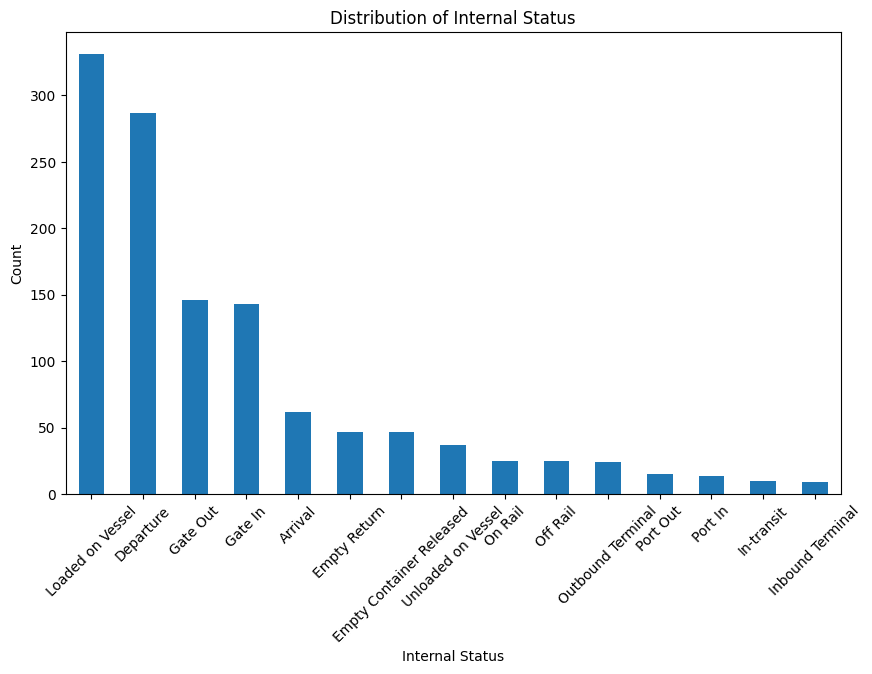

In [ ]:
from matplotlib import pyplot as plt
#import seaborn as sns
plt.figure(figsize=(10, 6))
df['internalStatus'].value_counts().plot(kind='bar')
plt.title('Distribution of Internal Status')
plt.xlabel('Internal Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

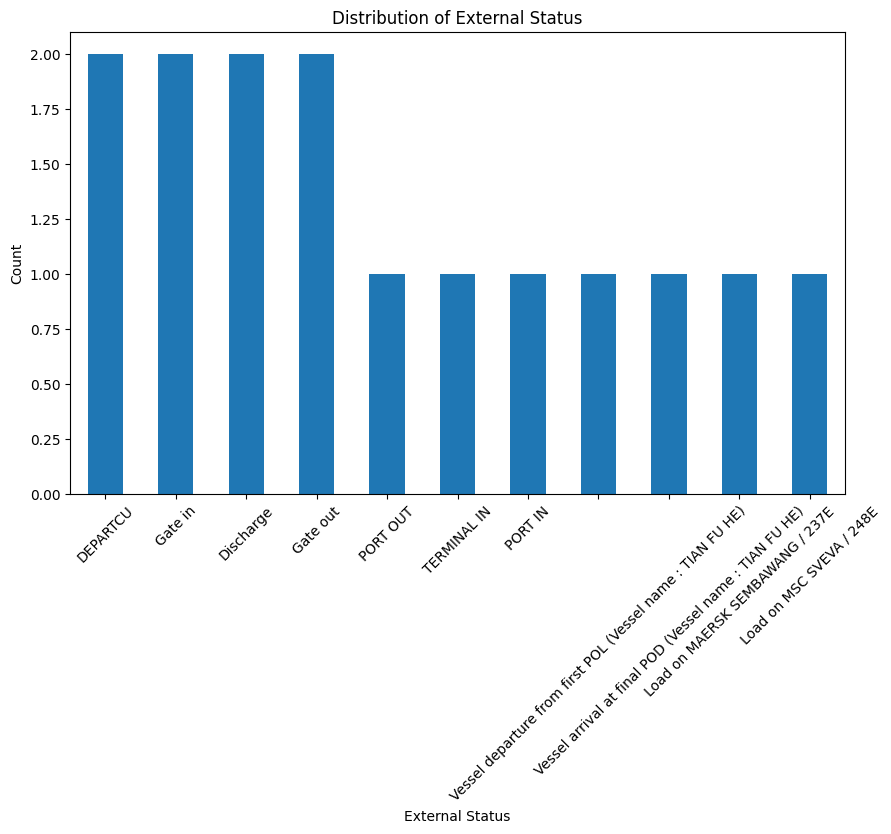

In [ ]:
plt.figure(figsize=(10, 6))
df_external_plt = df.head(15)
df_external_plt['externalStatus'].value_counts().plot(kind='bar')
plt.title('Distribution of External Status')
plt.xlabel('External Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.shape

(1222, 2)

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['externalStatus'])
encoded_external_statuses = tokenizer.texts_to_sequences(df['externalStatus'])
max_sequence_length = max(len(seq) for seq in encoded_external_statuses)
padded_external_statuses = pad_sequences(encoded_external_statuses,
                                         maxlen=max_sequence_length,
                                         padding='post')

In [ ]:
# Label Encoding
label_encoder = LabelEncoder()
encoded_internal_statuses = label_encoder.fit_transform(df['internalStatus'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_external_statuses,
                                                    encoded_internal_statuses,
                                                    test_size=0.2, random_state=42)

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=max_sequence_length))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(set(encoded_internal_statuses)), activation='softmax'))

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 12, 64)            9856      
                                                                 
 lstm (LSTM)                 (None, 128)               98816     
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 15)                975       
                                                                 
Total params: 117903 (460.56 KB)
Trainable params: 117903 (460.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model_fit = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
31/31 [==============================] - 10s 98ms/step - loss: 2.3611 - accuracy: 0.1894 - val_loss: 2.1723 - val_accuracy: 0.2163
Epoch 2/10
31/31 [==============================] - 1s 47ms/step - loss: 1.7958 - accuracy: 0.2590 - val_loss: 1.5964 - val_accuracy: 0.2776
Epoch 3/10
31/31 [==============================] - 2s 52ms/step - loss: 1.3211 - accuracy: 0.3695 - val_loss: 1.2300 - val_accuracy: 0.5429
Epoch 4/10
31/31 [==============================] - 2s 71ms/step - loss: 0.9393 - accuracy: 0.6244 - val_loss: 0.8115 - val_accuracy: 0.7510
Epoch 5/10
31/31 [==============================] - 1s 41ms/step - loss: 0.5669 - accuracy: 0.8291 - val_loss: 0.5911 - val_accuracy: 0.7918
Epoch 6/10
31/31 [==============================] - 1s 21ms/step - loss: 0.4482 - accuracy: 0.8414 - val_loss: 0.5732 - val_accuracy: 0.7878
Epoch 7/10
31/31 [==============================] - 1s 22ms/step - loss: 0.3792 - accuracy: 0.8588 - val_loss: 0.4560 - val_accuracy: 0.8449
Epoch 8/10
3

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

8/8 [==============================] - 0s 8ms/step - loss: 0.2751 - accuracy: 0.9102
Test Loss: 0.2750878930091858
Test Accuracy: 0.9102040529251099


In [ ]:
!pip install zodbpickle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 283.7/283.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pickle
with open('LSTM_model.pkl', 'wb') as file:
    pickle.dump((model_fit, tokenizer, model_fit), file)